In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Funkcija koja će nam pomoći da ispravno prikažemo slike
def prikazi(slika, naslov=""):
    # OpenCV koristi BGR, a Matplotlib RGB, pa moramo zamijeniti kanale
    if len(slika.shape) == 3:
        slika_rgb = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)
        plt.imshow(slika_rgb)
    else:
        plt.imshow(slika, cmap='gray')
    plt.title(naslov)
    plt.axis('off')
    plt.show()

Slika uspješno učitana!


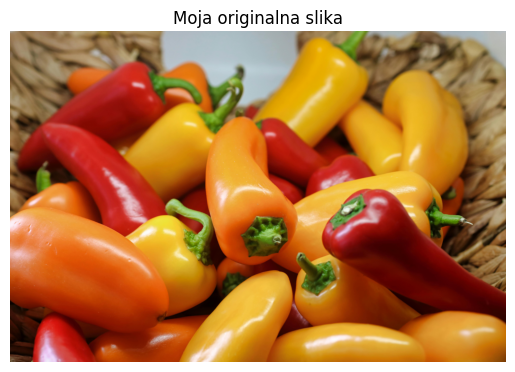

In [14]:
# Učitaj sliku koju si upravo uploadao
img = cv2.imread('/test_slika.jpg')

if img is None:
    print("Slika nije pronađena! Provjeri ime datoteke.")
else:
    print("Slika uspješno učitana!")
    prikazi(img, "Moja originalna slika")

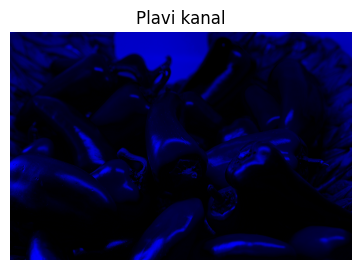

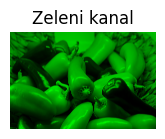

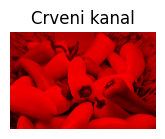

In [15]:
# Razdvajanje kanala
b, g, r = cv2.split(img)

# Napravimo crnu podlogu (nule) istih dimenzija kao slika
nule = np.zeros_like(b)

# Spajamo kanale tako da vidimo samo jedan po jedan
samo_plava = cv2.merge([b, nule, nule])
samo_zelena = cv2.merge([nule, g, nule])
samo_crvena = cv2.merge([nule, nule, r])

# Prikaz
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); prikazi(samo_plava, "Plavi kanal")
plt.subplot(1, 3, 2); prikazi(samo_zelena, "Zeleni kanal")
plt.subplot(1, 3, 3); prikazi(samo_crvena, "Crveni kanal")

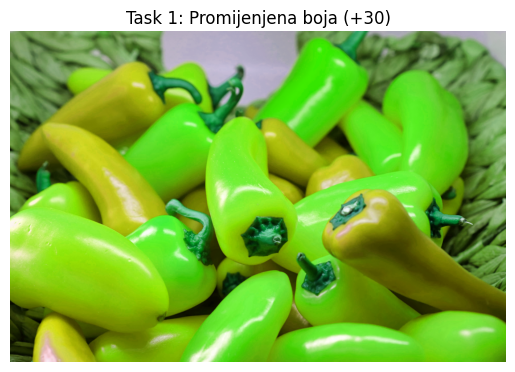

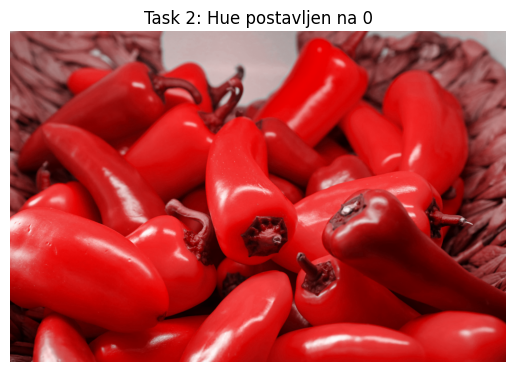

In [16]:
# Prebacivanje u HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# TASK 1: Dodaj 30 na Hue (mijenjaš boju, npr. crvena u žutu)
h_novo = (h.astype(int) + 30) % 180
h_novo = h_novo.astype(np.uint8)
hsv_task1 = cv2.merge([h_novo, s, v])
prikazi(cv2.cvtColor(hsv_task1, cv2.COLOR_HSV2BGR), "Task 1: Promijenjena boja (+30)")

# TASK 2: Postavi Hue na 0 (sve postaje crvenkasto)
h_nula = np.zeros_like(h)
hsv_task2 = cv2.merge([h_nula, s, v])
prikazi(cv2.cvtColor(hsv_task2, cv2.COLOR_HSV2BGR), "Task 2: Hue postavljen na 0")